**SIMULATE FUNCTIONS**

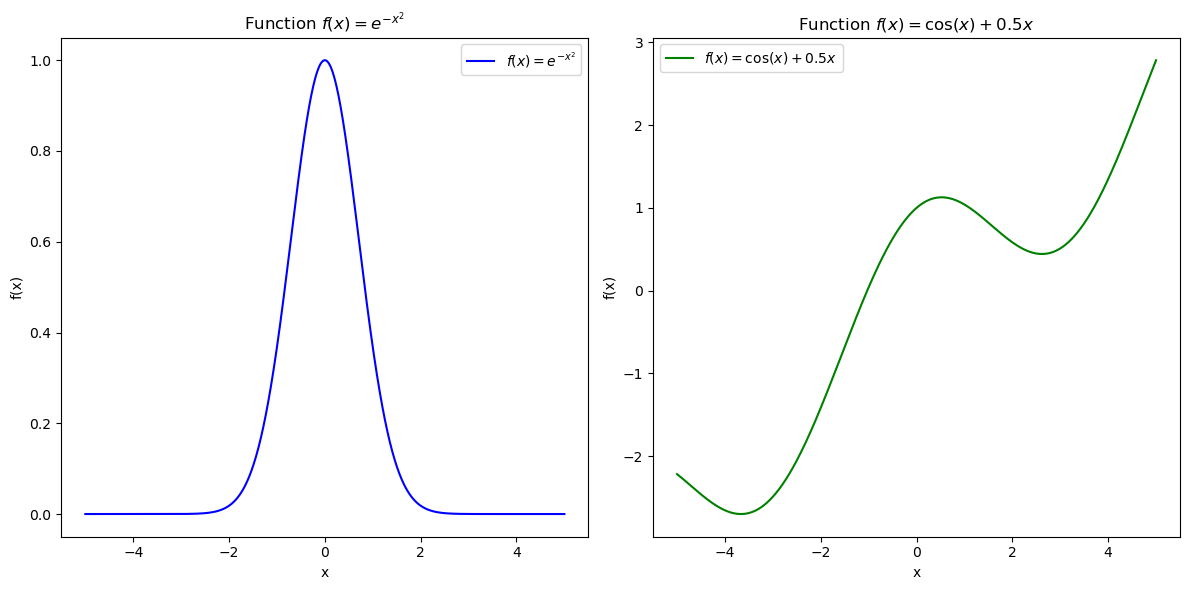

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simulated data
def generate_data():
    x = np.linspace(-5, 5, 1000).reshape(-1, 1).astype(np.float32)
    y1 = np.exp(-x**2)
    y2 = np.cos(x) + 0.5 * x
    return x, y1, y2

# Plot functions
def plot_functions(x, y1, y2):
    plt.figure(figsize=(12, 6))
    
    # Plot f(x) = e^{-x^2}
    plt.subplot(1, 2, 1)
    plt.plot(x, y1, label='$f(x) = e^{-x^2}$', color='blue')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Function $f(x) = e^{-x^2}$')
    plt.legend()
    
    # Plot f(x) = cos(x) + 0.5x
    plt.subplot(1, 2, 2)
    plt.plot(x, y2, label='$f(x) = \cos(x) + 0.5x$', color='green')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Function $f(x) = \cos(x) + 0.5x$')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Generate data and plot
x, y1, y2 = generate_data()
plot_functions(x, y1, y2)



Training ShallowNN...
Epoch 1/1000, Loss: 1.078222
Epoch 2/1000, Loss: 0.911722
Epoch 3/1000, Loss: 0.768032
Epoch 4/1000, Loss: 0.646825
Epoch 5/1000, Loss: 0.547327
Epoch 6/1000, Loss: 0.468223
Epoch 7/1000, Loss: 0.407592
Epoch 8/1000, Loss: 0.362864
Epoch 9/1000, Loss: 0.330854
Epoch 10/1000, Loss: 0.308063
Epoch 11/1000, Loss: 0.291236
Epoch 12/1000, Loss: 0.277880
Epoch 13/1000, Loss: 0.266464
Epoch 14/1000, Loss: 0.256270
Epoch 15/1000, Loss: 0.247095
Epoch 16/1000, Loss: 0.238974
Epoch 17/1000, Loss: 0.231970
Epoch 18/1000, Loss: 0.226087
Epoch 19/1000, Loss: 0.221236
Epoch 20/1000, Loss: 0.217267
Epoch 21/1000, Loss: 0.213997
Epoch 22/1000, Loss: 0.211229
Epoch 23/1000, Loss: 0.208755
Epoch 24/1000, Loss: 0.206363
Epoch 25/1000, Loss: 0.203842
Epoch 26/1000, Loss: 0.201005
Epoch 27/1000, Loss: 0.197705
Epoch 28/1000, Loss: 0.193861
Epoch 29/1000, Loss: 0.189463
Epoch 30/1000, Loss: 0.184580
Epoch 31/1000, Loss: 0.179341
Epoch 32/1000, Loss: 0.173922
Epoch 33/1000, Loss: 0.168

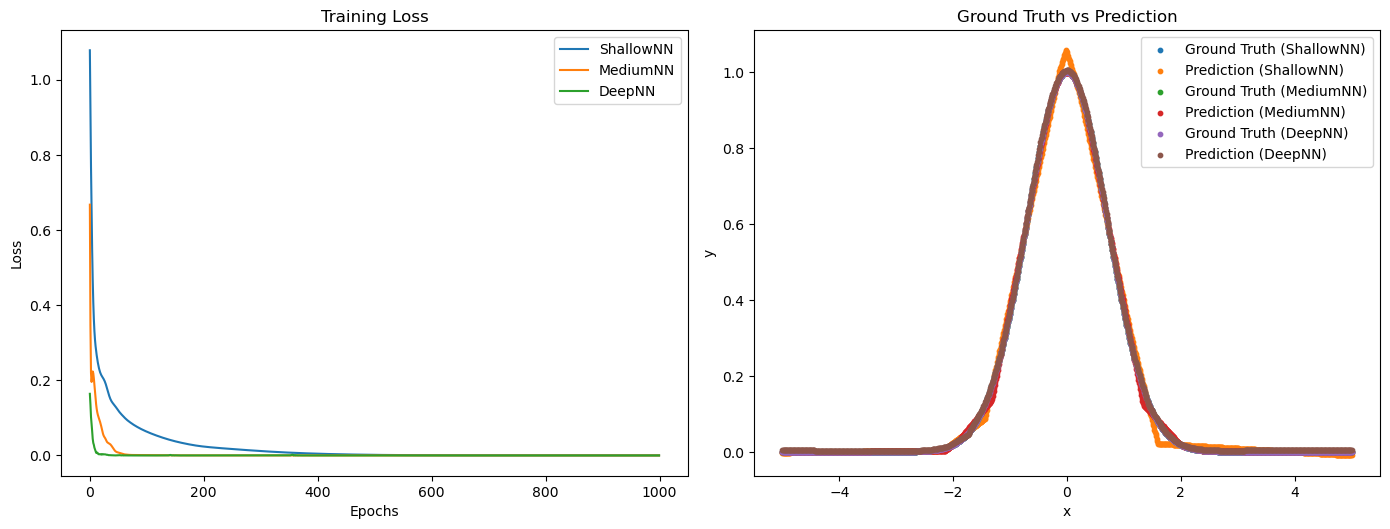

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define models
class ShallowNN(nn.Module):
    def __init__(self):
        super(ShallowNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MediumNN(nn.Module):
    def __init__(self):
        super(MediumNN, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(1, 40)
        self.fc2 = nn.Linear(40, 30)
        self.fc3 = nn.Linear(30, 20)
        self.fc4 = nn.Linear(20, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Training function
def train_model(model, criterion, optimizer, x_train, y_train, epochs=1000):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # Store the loss and print it with the epoch
        train_losses.append(loss.item())
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}')
    return train_losses

# Generate simulated data for f(x) = e^{-x^2}
def generate_data_e():
    x = np.linspace(-5, 5, 1000).reshape(-1, 1).astype(np.float32)
    y = np.exp(-x**2)
    return torch.tensor(x), torch.tensor(y)

# Plotting function
def plot_results(train_losses_dict, x, y_true_dict, y_pred_dict, model_names):
    plt.figure(figsize=(14, 10))
    
    # Plot training loss
    plt.subplot(2, 2, 1)
    for name, losses in train_losses_dict.items():
        plt.plot(losses, label=name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    # Plot ground truth vs predictions for all models in one graph
    plt.subplot(2, 2, 2)
    for model_name, y_true in y_true_dict.items():
        plt.scatter(x.numpy(), y_true.numpy(), label=f'Ground Truth ({model_name})', s=10)
        plt.scatter(x.numpy(), y_pred_dict[model_name].detach().numpy(), label=f'Prediction ({model_name})', s=10)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Ground Truth vs Prediction')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Initialize and train models for f(x) = e^{-x^2}
x, y = generate_data_e()

models = {
    'ShallowNN': ShallowNN(),
    'MediumNN': MediumNN(),
    'DeepNN': DeepNN()
}

criterion = nn.MSELoss()
train_losses_dict = {}
y_true_dict = {'ShallowNN': y, 'MediumNN': y, 'DeepNN': y}
y_pred_dict = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    train_losses = train_model(model, criterion, optimizer, x, y)
    train_losses_dict[model_name] = train_losses
    
    # Make predictions
    with torch.no_grad():
        y_pred_dict[model_name] = model(x)
    
# Plot results
plot_results(train_losses_dict, x, y_true_dict, y_pred_dict, list(models.keys()))


Epoch [100/1000], Loss: 0.2234
Epoch [200/1000], Loss: 0.1581
Epoch [300/1000], Loss: 0.0819
Epoch [400/1000], Loss: 0.0260
Epoch [500/1000], Loss: 0.0074
Epoch [600/1000], Loss: 0.0055
Epoch [700/1000], Loss: 0.0050
Epoch [800/1000], Loss: 0.0046
Epoch [900/1000], Loss: 0.0044
Epoch [1000/1000], Loss: 0.0043
Epoch [100/1000], Loss: 0.7410
Epoch [200/1000], Loss: 0.2462
Epoch [300/1000], Loss: 0.0770
Epoch [400/1000], Loss: 0.0240
Epoch [500/1000], Loss: 0.0090
Epoch [600/1000], Loss: 0.0052
Epoch [700/1000], Loss: 0.0044
Epoch [800/1000], Loss: 0.0042
Epoch [900/1000], Loss: 0.0041
Epoch [1000/1000], Loss: 0.0041
Epoch [100/1000], Loss: 0.0429
Epoch [200/1000], Loss: 0.0005
Epoch [300/1000], Loss: 0.0002
Epoch [400/1000], Loss: 0.0002
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0004
Epoch [800/1000], Loss: 0.0002
Epoch [900/1000], Loss: 0.0002
Epoch [1000/1000], Loss: 0.0001


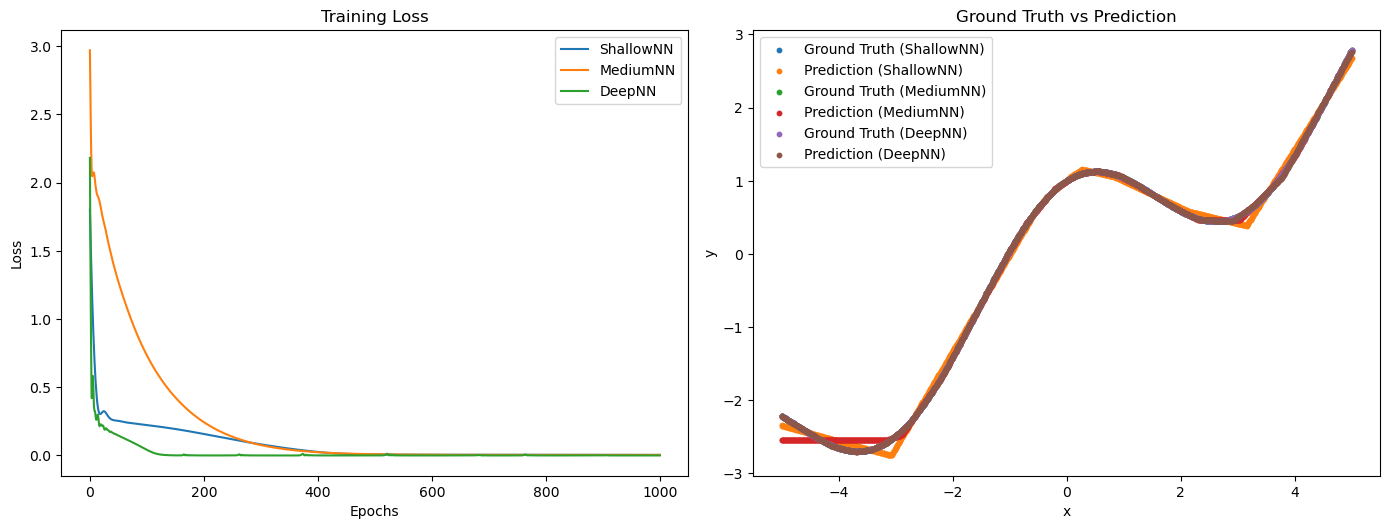

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define models
class ShallowNN(nn.Module):
    def __init__(self):
        super(ShallowNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MediumNN(nn.Module):
    def __init__(self):
        super(MediumNN, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(1, 40)
        self.fc2 = nn.Linear(40, 30)
        self.fc3 = nn.Linear(30, 20)
        self.fc4 = nn.Linear(20, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Training function

def train_model(model, criterion, optimizer, x_train, y_train, epochs=1000):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())

        # Print epoch and loss
        if (epoch+1) % 100 == 0:  # Print every 100 epochs (adjust as needed)
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
            
    return train_losses


# Generate simulated data for f(x) = cos(x) + 0.5x
def generate_data_cos():
    x = np.linspace(-5, 5, 1000).reshape(-1, 1).astype(np.float32)
    y = np.cos(x) + 0.5 * x
    return torch.tensor(x), torch.tensor(y)

# Plotting function
def plot_results(train_losses_dict, x, y_true_dict, y_pred_dict, model_names):
    plt.figure(figsize=(14, 10))
    
    # Plot training loss
    plt.subplot(2, 2, 1)
    for name, losses in train_losses_dict.items():
        plt.plot(losses, label=name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    # Plot ground truth vs predictions for all models in one graph
    plt.subplot(2, 2, 2)
    for model_name, y_true in y_true_dict.items():
        plt.scatter(x.numpy(), y_true.numpy(), label=f'Ground Truth ({model_name})', s=10)
        plt.scatter(x.numpy(), y_pred_dict[model_name].detach().numpy(), label=f'Prediction ({model_name})', s=10)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Ground Truth vs Prediction')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Initialize and train models for f(x) = cos(x) + 0.5x
x, y = generate_data_cos()

models = {
    'ShallowNN': ShallowNN(),
    'MediumNN': MediumNN(),
    'DeepNN': DeepNN()
}

criterion = nn.MSELoss()
train_losses_dict = {}
y_true_dict = {'ShallowNN': y, 'MediumNN': y, 'DeepNN': y}
y_pred_dict = {}

for model_name, model in models.items():
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    train_losses = train_model(model, criterion, optimizer, x, y)
    train_losses_dict[model_name] = train_losses
    
    # Make predictions
    with torch.no_grad():
        y_pred_dict[model_name] = model(x)
    
# Plot results
plot_results(train_losses_dict, x, y_true_dict, y_pred_dict, list(models.keys()))


**TRAIN ON ACTUAL TASKS**

Loading MNIST data...
Data loaded.

Starting training for SimpleCNN...
Training model: SimpleCNN
Epoch [1/3], Batch [100/938], Loss: 0.4794
Epoch [1/3], Batch [200/938], Loss: 0.1434
Epoch [1/3], Batch [300/938], Loss: 0.3162
Epoch [1/3], Batch [400/938], Loss: 0.1757
Epoch [1/3], Batch [500/938], Loss: 0.1780
Epoch [1/3], Batch [600/938], Loss: 0.1830
Epoch [1/3], Batch [700/938], Loss: 0.0634
Epoch [1/3], Batch [800/938], Loss: 0.0428
Epoch [1/3], Batch [900/938], Loss: 0.1375
Epoch [1/3] completed. Average Loss: 0.2686, Accuracy: 92.40%
Epoch [2/3], Batch [100/938], Loss: 0.1327
Epoch [2/3], Batch [200/938], Loss: 0.1718
Epoch [2/3], Batch [300/938], Loss: 0.0683
Epoch [2/3], Batch [400/938], Loss: 0.0452
Epoch [2/3], Batch [500/938], Loss: 0.0281
Epoch [2/3], Batch [600/938], Loss: 0.0597
Epoch [2/3], Batch [700/938], Loss: 0.0777
Epoch [2/3], Batch [800/938], Loss: 0.1052
Epoch [2/3], Batch [900/938], Loss: 0.1726
Epoch [2/3] completed. Average Loss: 0.0933, Accuracy: 97.23%
Epoch

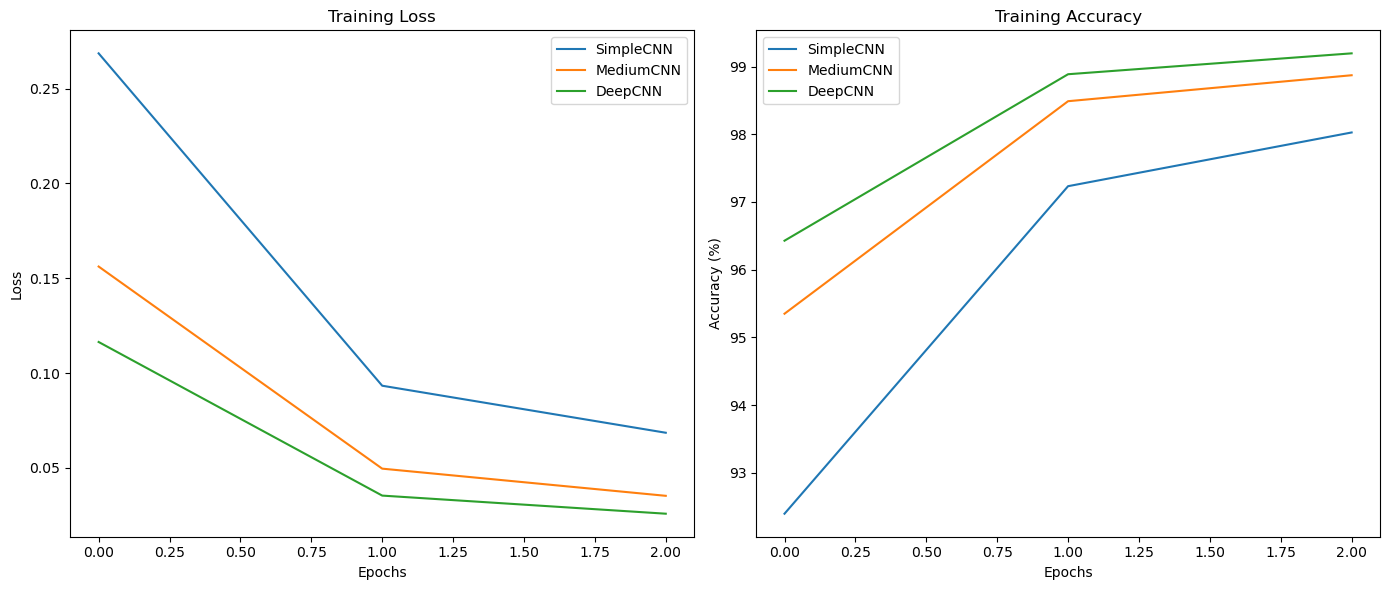

Results plotted.



In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define simplified CNN models
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 14 * 14, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

class MediumCNN(nn.Module):
    def __init__(self):
        super(MediumCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(256 * 3 * 3, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv3(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# Training function with accuracy calculation
def train_model(model, criterion, optimizer, train_loader, epochs=3):
    print(f"Training model: {model.__class__.__name__}")
    model.train()
    train_losses = []
    train_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        
        for i, (images, labels) in enumerate(train_loader, 1):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

            if i % 100 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Batch [{i}/{len(train_loader)}], Loss: {loss.item():.4f}")
        
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct_predictions / total_predictions * 100
        
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)
        
        print(f"Epoch [{epoch+1}/{epochs}] completed. Average Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")
    
    print(f"Training complete for model: {model.__class__.__name__}\n")
    return train_losses, train_accuracies

# Load MNIST data
print("Loading MNIST data...")
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
print("Data loaded.\n")

# Initialize models
models = {
    'SimpleCNN': SimpleCNN(),
    'MediumCNN': MediumCNN(),
    'DeepCNN': DeepCNN()
}

criterion = nn.CrossEntropyLoss()
train_losses_dict = {}
train_accuracies_dict = {}

# Train models and store losses and accuracies
for model_name, model in models.items():
    print(f"Starting training for {model_name}...")
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, train_accuracies = train_model(model, criterion, optimizer, train_loader)
    train_losses_dict[model_name] = train_losses
    train_accuracies_dict[model_name] = train_accuracies

# Plot results (both loss and accuracy)
def plot_cnn_results(train_losses_dict, train_accuracies_dict):
    print("Plotting results...")
    plt.figure(figsize=(14, 6))
    
    # Plot training loss
    plt.subplot(1, 2, 1)
    for name, losses in train_losses_dict.items():
        plt.plot(losses, label=name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    # Plot training accuracy
    plt.subplot(1, 2, 2)
    for name, accuracies in train_accuracies_dict.items():
        plt.plot(accuracies, label=name)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    print("Results plotted.\n")

plot_cnn_results(train_losses_dict, train_accuracies_dict)
